# Classification

It is a problem of machine learning where an image (or) text is being categorised . There are different ypes of classification:
1. Binary classification: Used to categorise input data into 2 classes.
2. multi-class classification: Used to categorise input data into one of the possible multi-classes.
3. multi-label classification: input data is categorised into multiple labels.

Multi class V/S multi-label classification:
* In multi-class classificatio, one input image will be categorised into a single label out of the multiple classes.
* In multi-label classification, one input data will be categorised into multiple labels.

Architecture of classification problem:
<table>
    <tr>
        <th>Hyperparameter</th>
        <th>Binary Classification</th>
        <th>Multiclass Classification</th>
    </tr>
    <tr>
        <td>Input Layer (In Features)</td>
        <td>Same as number of features (eg. 5 for age, sex, height, disease type, smoking status)</td>
        <td>Same as binary Classification</td>
    </tr>
    <tr>
        <td>Hidden layers</td>
        <td>Problem specific, minimum =1 and maximum = unlimited</td>
        <td>Same as binary Classification</td>
    </tr>
    <tr>
        <td>Neurons per layer</td>
        <td>problem speific, can range from 10, 512</td>
        <td>Same as binary Classification</td>
    </tr>
    <tr>
        <td>Output Layer (Out Features)</td>
        <td>1</td>
        <td>1 per class</td>
    </tr>
    <tr>
        <td>Hidden Layer Activation</td>
        <td>ReLU or can be any other</td>
        <td>Same as binary Classification</td>
    </tr>
    <tr>
        <td>Output Layer Activation</td>
        <td>Sigmoid</td>
        <td>Softmax</td>
    </tr>
    <tr>
        <td>Loss Function</td>
        <td>Binary Cross Entropy</td>
        <td>Cross Entropy</td>
    </tr>
    <tr>
        <td>Optimizer</td>
        <td>SGA, ADAM or there are others</td>
        <td>Same as binary classification</td>
    </tr>
</table>

# Binary Classification

# Create dataset 

In [1]:
import sklearn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import torch
from torch import nn
import pandas as pd
from sklearn.model_selection import train_test_split
import requests
from pathlib import Path

In [2]:
X, y = make_circles(1000, noise = 0.03, random_state=42)

# make a dataframe of the created dataset
df = pd.DataFrame({'X1': X[:,0] , 'X2': X[:,1], 'y': y[:]})


# Visialize the data

This will help us understand the problem statement better:
After visualisation, we understand that :
* We need to do a binary classification to understand whta will be the y values? Do they fall under 0 or 1 (Red or Blue)



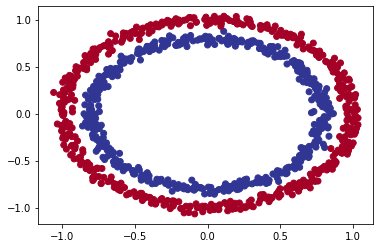

In [3]:
plt.scatter(x = X[:, 0], y = X[:,1], c = y, cmap = plt.cm.RdYlBu )

# Train and Test Split

In [4]:
# convert nd array to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [5]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# Build Model

In [6]:
class CircleClassifierVersion1(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer_1 = torch.nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscale to 5 features. meaning starts at 2 features and learns 5 features
        self.layer_2 = torch.nn.Linear(in_features=5, out_features=1) # takes 5 features from previous layer and outputs 1 feature

    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x goes into layer 1 and output of that goes to layer 2. x -> layer 1 -> layer 2

# instantiate the class
model_v0 = CircleClassifierVersion1()

# refine the above code using nn.sequental

model_v0 = torch.nn.Sequential(torch.nn.Linear(in_features=2, out_features=5), 
                            torch.nn.Linear(in_features=5, out_features=1))


In [7]:
# Updated Code version 2 considering nn sequential
class CircleClassifierVersion2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.two_linear_layers_ = torch.nn.Sequential(
            torch.nn.Linear(in_features=2, out_features=5),
            torch.nn.Linear(in_features=5, out_features=1)
        )

    def forward(self, x):
        return self.two_linear_layers_(x)

model_v1 = CircleClassifierVersion2()
model_v1.state_dict()




OrderedDict([('two_linear_layers_.0.weight',
              tensor([[ 0.4436, -0.6541],
                      [ 0.1865, -0.3290],
                      [ 0.6685, -0.0423],
                      [ 0.0689,  0.1468],
                      [-0.0896, -0.4137]])),
             ('two_linear_layers_.0.bias',
              tensor([ 0.4919, -0.2740, -0.2742,  0.5962, -0.2405])),
             ('two_linear_layers_.1.weight',
              tensor([[-0.1303, -0.1563, -0.1072, -0.3512, -0.2790]])),
             ('two_linear_layers_.1.bias', tensor([-0.3465]))])

# Setup Loss and optimizer

* In classification problem Binary cross entropy (or) cross entropy is used. For Regression problems, MAE or RMSE is used.
* The output of this model will be logits. The reason is that there is no activation function applied to the output layer, and the BCEWithLogitsLoss loss function is designed to work with logits. This loss function combines a sigmoid activation function and binary cross-entropy loss into a single function to improve numerical stability during training. Therefore, it expects the model to output logits, not probabilities.




In [8]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optim = torch.optim.SGD(params = model_v1.parameters(), lr=0.01)

In [27]:
def accuracy(y_true, y_pred):
    acc = ((torch.eq(y_true, y_pred).sum().item())/ len(y_pred))*100

    return acc


# Train Model

**NOTE** One important thing that needs to be understood it that, the model outputs logits. These logits need to be converted into predictions. This is done as follows:
* logits -> apply non linear activation function to change into probabilities - > round the probabilities to get predictions.

**IMPORTANT**
* In PyTorch, the term "logits" generally refers to the output of the last linear layer of a model, before it is passed through a non-linear activation function such as softmax.
* In Regression why is the output of the last layer not called logit?
    * The term "logits" is generally used to refer specifically to the output of the final linear layer of a **classification model**. The logits can then be passed through a softmax function to obtain a normalized probability distribution over classes.
    * In the case of a regression model, the output is not a probability distribution over classes, but rather a continuous value. As a result, the output of a regression model is not generally referred to as a "logit".
    * BCEWithLogitsLoss requires inputs as logits. BCE loss requires y_preds as inputs. 

In [10]:
epochs = 100
epoch_values = []
train_loss_values = []
test_loss_values = []
train_acc_values = []
test_acc_values = []


for epoch in range(epochs):
    model_v1.train()
    
    # do the forward pass
    y_logits = model_v1.forward(X_train).squeeze()

    # turn logits into preds
    y_pred = torch.round(torch.sigmoid(y_logits))

    # calculate the loss and accuracy
    # train_loss = loss_fn(torch.nn.Sigmoid(y_logits), y_train) # this is implemented with BCE loss because it expexts inputs as y_preds
    train_loss = loss_fn(y_logits, y_train) #BCEWithLogits expects inputs as logits
    train_acc = accuracy( y_true= y_train, y_pred= y_pred)

    # zero grad the optimizer
    optim.zero_grad()

    # backward pass
    train_loss.backward()

    # take the step depending
    optim.step()

    model_v1.eval()
    with torch.inference_mode():
        test_logits = model_v1.forward(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy(y_true=y_test, y_pred = test_pred)

    if epoch % 10 == 0:
        print(f"epochs : {epoch} | train loss: {train_loss} | test_loss : {test_loss} | train accuracy : {train_acc} | test accuracy : {test_acc}" )
        train_acc_values.append(train_acc)
        test_acc_values.append(test_acc)
        epoch_values.append(epoch)
        train_loss_values.append(train_loss)
        test_loss_values.append(test_loss)

epochs : 0 | train loss: 0.7246957421302795 | test_loss : 0.7256832718849182 | train accuracy : 0.5 | test accuracy : 0.5
epochs : 10 | train loss: 0.721859872341156 | test_loss : 0.7229571342468262 | train accuracy : 0.5 | test accuracy : 0.5
epochs : 20 | train loss: 0.719291090965271 | test_loss : 0.7204895615577698 | train accuracy : 0.5 | test accuracy : 0.5
epochs : 30 | train loss: 0.7169632911682129 | test_loss : 0.7182554006576538 | train accuracy : 0.5 | test accuracy : 0.5
epochs : 40 | train loss: 0.7148532867431641 | test_loss : 0.7162319421768188 | train accuracy : 0.5 | test accuracy : 0.5
epochs : 50 | train loss: 0.7129402160644531 | test_loss : 0.7143987417221069 | train accuracy : 0.5 | test accuracy : 0.5
epochs : 60 | train loss: 0.7112050652503967 | test_loss : 0.7127374410629272 | train accuracy : 0.5 | test accuracy : 0.5
epochs : 70 | train loss: 0.7096310257911682 | test_loss : 0.711231529712677 | train accuracy : 0.5 | test accuracy : 0.5
epochs : 80 | train 

#### Looks like the accuracy is very low. 
## **Analyse to see what's going wrong with the model**

In [12]:
# download helper function to plot decision boundry
if Path("helper_functions.py").is_file():
    print("helper functions exist and skip download")

else:
    print("Down the helper functions")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper functions exist and skip download


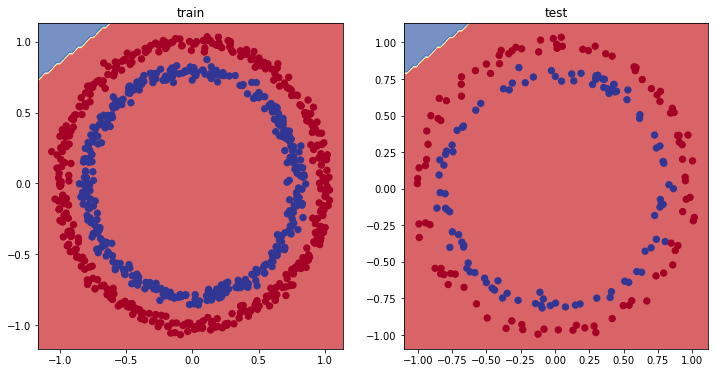

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_v1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_v1, X_test, y_test)

##### The above decision boundry graph shows that the model is drawing a straight line and trying to fit the data.

# Improving the model

* Add more layers - has a chance of learning more patterns
* Add more hidden units - can increase from 5 to 10 hidden neurons.
* Add more epochs
* Add Activation Function- Add activation functions between layers
* Change learning rate - need to find the balance. Small updates can lead to vanishing gradient and large updates can lead to exploding gradient problems.
* Change the loss function 

In [14]:
class NewModel(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.two_layers = torch.nn.Sequential(
            torch.nn.Linear(in_features= 2, out_features= 10),
            torch.nn.Linear(in_features= 10 , out_features = 1)
        )
    
    def forward(self, x):
        return self.two_layers(x)

In [15]:
new_model = NewModel()
new_loss_fn = torch.nn.BCEWithLogitsLoss()
new_optim = torch.optim.SGD(params=new_model.parameters(), lr = 0.01)

In [28]:
epochs = 1000

for epoch in range(epochs):
    new_model.train()

    # forward pass
    new_train_logits = new_model.forward(X_train).squeeze()

    # turn logits to preictions
    new_train_preds = torch.round(torch.sigmoid(new_train_logits))

    # calculate the loss and accuracy
    new_train_loss = new_loss_fn(new_train_logits, y_train)
    new_train_acc = accuracy(y_true = y_train, y_pred = new_train_preds)

    # make optimizer zero grad
    new_optim.zero_grad()

    # backpropogation
    new_train_loss.backward()

    # optimizer step
    new_optim.step()

    new_model.eval()
    with torch.inference_mode():
        
        new_test_logits = new_model.forward(X_test).squeeze()
        new_test_preds = torch.round(torch.sigmoid(new_test_logits))

        # loss and accuracy
        new_test_loss = new_loss_fn(new_test_logits, y_test)
        new_test_acc = accuracy(y_true=y_test, y_pred= new_test_preds)

    if epoch % 10 == 0 :
        print(f"epochs : {epoch} | train loss: {new_train_loss} | test_loss : {new_test_loss} | train accuracy : {new_train_acc} | test accuracy : {new_test_acc}" )




epochs : 0 | train loss: 0.6930320858955383 | test_loss : 0.694815993309021 | train accuracy : 50.5 | test accuracy : 47.0
epochs : 10 | train loss: 0.6930299997329712 | test_loss : 0.6948119401931763 | train accuracy : 50.24999999999999 | test accuracy : 47.0
epochs : 20 | train loss: 0.6930282115936279 | test_loss : 0.6948078870773315 | train accuracy : 50.375 | test accuracy : 47.0
epochs : 30 | train loss: 0.6930264234542847 | test_loss : 0.6948040723800659 | train accuracy : 50.24999999999999 | test accuracy : 47.0
epochs : 40 | train loss: 0.6930245757102966 | test_loss : 0.6948002576828003 | train accuracy : 50.375 | test accuracy : 47.0
epochs : 50 | train loss: 0.6930229067802429 | test_loss : 0.6947966814041138 | train accuracy : 50.5 | test accuracy : 46.5
epochs : 60 | train loss: 0.693021297454834 | test_loss : 0.6947931051254272 | train accuracy : 50.625 | test accuracy : 46.5
epochs : 70 | train loss: 0.6930198073387146 | test_loss : 0.6947896480560303 | train accuracy :

#### The model is still 50% accuracy on the test set. Let's plot the decision boundry again

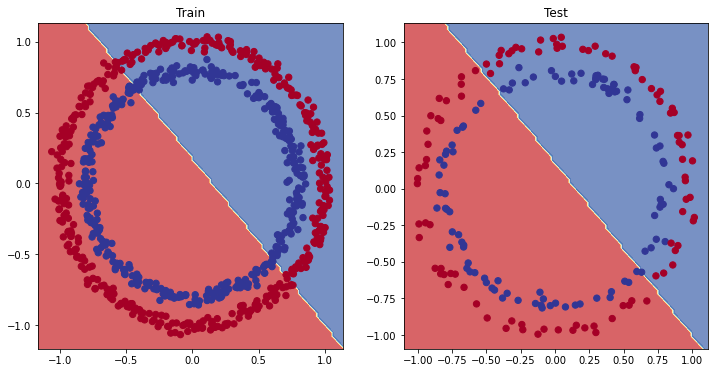

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(new_model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(new_model, X_test, y_test)

##### The model is still trying to fit in a straight line. 
#### Looks like since the data is a circle, it is non-linear data and requires introduction of non-linearity in the model

In [20]:
class CircleNonLinearModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer_1 = torch.nn.Linear(in_features=2, out_features= 10)
        self.layer_2 = torch.nn.Linear(in_features=10, out_features=10)
        self.layer_3 = torch.nn.Linear(in_features=10, out_features=1)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [21]:
model_nonlinear = CircleNonLinearModel()
loss_fn_non_linear = torch.nn.BCEWithLogitsLoss()
optim_non_linear = torch.optim.SGD(params=model_nonlinear.parameters(), lr=0.1)


In [29]:
# random seeds 
torch.manual_seed(42)
epochs = 10000

for epoch in range(epochs):
    model_nonlinear.train()

    # do the forward pass
    y_train_logits_non_linear = model_nonlinear.forward(X_train).squeeze()

    # convert logits to y preds
    y_train_preds_non_linear = torch.round(torch.sigmoid(y_train_logits_non_linear))

    # calculate loss and accuracy
    y_train_loss_non_linear = loss_fn_non_linear(y_train_logits_non_linear, y_train)
    train_acc_non_linear = accuracy(y_true=y_train, y_pred=y_train_preds_non_linear)

    # make zero grad
    optim_non_linear.zero_grad()

    # backpropogation
    y_train_loss_non_linear.backward()

    # optimizer step 
    optim_non_linear.step()

    model_nonlinear.eval()
    with torch.inference_mode():
         y_test_logits_non_linear = model_nonlinear.forward(X_test).squeeze()

         y_test_preds_non_linear = torch.round(torch.sigmoid(y_test_logits_non_linear))
         
         y_test_loss_non_linear = loss_fn_non_linear(y_test_logits_non_linear, y_test)
         test_acc_non_linear = accuracy(y_true=y_test, y_pred=y_test_preds_non_linear)

    
    if epoch % 100 == 0 :
        print(f"epoch : {epoch} | train acc : {train_acc_non_linear} | test acc : {test_acc_non_linear}")


epoch : 0 | train acc : 100.0 | test acc : 100.0
epoch : 100 | train acc : 100.0 | test acc : 100.0
epoch : 200 | train acc : 100.0 | test acc : 100.0
epoch : 300 | train acc : 100.0 | test acc : 100.0
epoch : 400 | train acc : 100.0 | test acc : 100.0
epoch : 500 | train acc : 100.0 | test acc : 100.0
epoch : 600 | train acc : 100.0 | test acc : 100.0
epoch : 700 | train acc : 100.0 | test acc : 100.0
epoch : 800 | train acc : 100.0 | test acc : 100.0
epoch : 900 | train acc : 100.0 | test acc : 100.0
epoch : 1000 | train acc : 100.0 | test acc : 100.0
epoch : 1100 | train acc : 100.0 | test acc : 100.0
epoch : 1200 | train acc : 100.0 | test acc : 100.0
epoch : 1300 | train acc : 100.0 | test acc : 100.0
epoch : 1400 | train acc : 100.0 | test acc : 100.0
epoch : 1500 | train acc : 100.0 | test acc : 100.0
epoch : 1600 | train acc : 100.0 | test acc : 100.0
epoch : 1700 | train acc : 100.0 | test acc : 100.0
epoch : 1800 | train acc : 100.0 | test acc : 100.0
epoch : 1900 | train acc

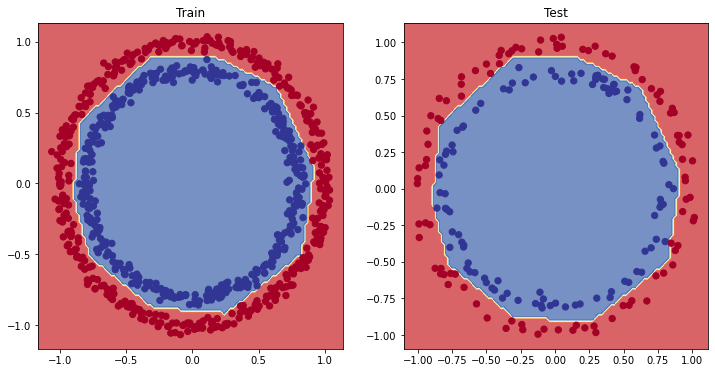

In [30]:
# plot to se the decision boundry
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_nonlinear, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_nonlinear, X_test, y_test)

##### From the above decision boundry graph we can deduce the power of non-linearity. By introducing Relu between each layer the model was able to linear than data is not a straight line however, it is a circle.

# Multi-class Classification

### Create Multi class dataset

In [31]:
from sklearn.datasets import make_blobs

In [89]:
X, y = make_blobs(n_samples=1000, centers=4, n_features=2,random_state=42, cluster_std=1.5)

X_tensor = torch.from_numpy(X).type(dtype=torch.float)
y_tensor = torch.from_numpy(y).type(dtype=torch.LongTensor)

# split into train and test sset
X_blob_train , X_blob_test, y_blob_train, y_blob_test = train_test_split(X_tensor, y_tensor, test_size=0.2, )

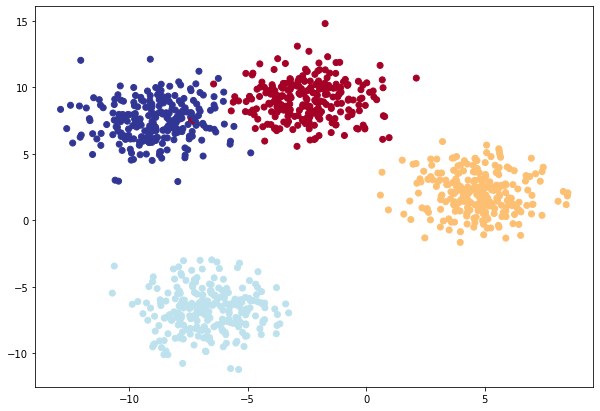

In [90]:
# visualise dataset
plt.figure(figsize=(10,7))
plt.scatter(X_tensor[:,0], X_tensor[:,1], c=y_tensor, cmap = plt.cm.RdYlBu)


<AxesSubplot:>

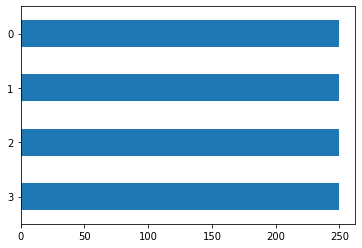

In [91]:
# make dataframe and visualise labels
df_blobs = pd.DataFrame({"X1":X_tensor[:,0], "X2": X_tensor[:,1], "y": y_tensor[:]})
df_blobs['y'].value_counts().plot(kind='barh')

# Creating model

In multilabel classification 
logits(raw output of model) -> pred probabilities (use softmax) -> predlabels (take argmax of prediction probabilities)

In [92]:
class MultiClassClassification(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer_1 = torch.nn.Linear(in_features=2, out_features=10)
        self.layer_2 = torch.nn.Linear(in_features=10, out_features=10)
        self.layer_3 = torch.nn.Linear(in_features=10, out_features=4)
        self.leaky_relu = torch.nn.LeakyReLU()

    def forward(self, x):
        return self.layer_3(self.leaky_relu(self.layer_2(self.leaky_relu(self.layer_1(x)))))

In [93]:

multi_class_model = MultiClassClassification()
multi_class_loss_fn = torch.nn.CrossEntropyLoss()
multi_class_optim = torch.optim.Adam(params=multi_class_model.parameters(), lr = 0.1)

In [95]:
epochs = 1000

for epoch in range(epochs):
    multi_class_model.train()

    # forward pass
    multi_class_logits = multi_class_model.forward(X_blob_train)

    # y_preds
    multi_class_train_y_preds = torch.softmax(multi_class_logits, dim=1).argmax(dim=1)

    # calculate the loss and accuracy
    multi_class_train_loss = multi_class_loss_fn(multi_class_logits, y_blob_train)
    multi_class_train_acc = accuracy(y_true=y_blob_train, y_pred = multi_class_train_y_preds)

    # zero grad
    multi_class_optim.zero_grad()

    # backpropogation
    multi_class_train_loss.backward()

    # optimizer step
    multi_class_optim.step()

    multi_class_model.eval()
    with torch.inference_mode():
        multi_class_test_logits = multi_class_model.forward(X_blob_test)

        # convert to pred
        multi_class_test_y_preds = torch.softmax(multi_class_test_logits, dim=1).argmax(dim=1)

        # calculate loss and accuracy
        multi_class_test_loss = multi_class_loss_fn(multi_class_test_logits, y_blob_test)
        multi_class_test_acc = accuracy(y_true=y_blob_test, y_pred = multi_class_test_y_preds)

    if epoch % 100 == 0:
        print(f"epoch : {epoch} | train acc : {multi_class_train_acc} | test acc : {multi_class_test_acc}")

epoch : 0 | train acc : 99.375 | test acc : 100.0
epoch : 100 | train acc : 99.375 | test acc : 100.0
epoch : 200 | train acc : 99.375 | test acc : 100.0
epoch : 300 | train acc : 99.375 | test acc : 100.0
epoch : 400 | train acc : 99.375 | test acc : 100.0
epoch : 500 | train acc : 99.375 | test acc : 100.0
epoch : 600 | train acc : 99.5 | test acc : 100.0
epoch : 700 | train acc : 99.5 | test acc : 100.0
epoch : 800 | train acc : 99.375 | test acc : 100.0
epoch : 900 | train acc : 99.5 | test acc : 100.0


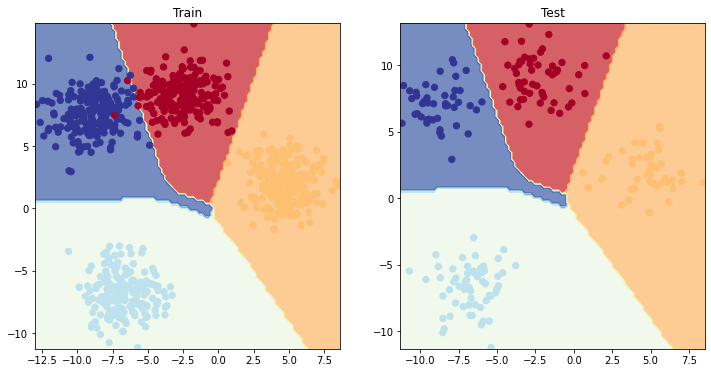

In [97]:
# plot to se the decision boundry
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(multi_class_model, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(multi_class_model, X_blob_test, y_blob_test)

## Make predictions

In [98]:
multi_class_model.eval()
with torch.inference_mode():
    y_prediction_logits = multi_class_model.forward(X_blob_test) 

In [106]:
torch.softmax(y_prediction_logits, dim=1).argmax(dim=1)

tensor([1, 3, 0, 3, 2, 2, 1, 0, 2, 3, 1, 1, 1, 3, 3, 2, 2, 3, 0, 1, 0, 0, 3, 0,
        0, 0, 2, 0, 3, 2, 1, 1, 1, 0, 1, 3, 3, 2, 1, 0, 3, 1, 3, 3, 1, 3, 3, 0,
        2, 0, 0, 1, 2, 3, 3, 2, 2, 2, 1, 2, 3, 0, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2,
        2, 0, 0, 1, 2, 0, 2, 3, 0, 2, 2, 1, 3, 2, 1, 1, 1, 0, 2, 0, 2, 3, 0, 1,
        3, 0, 3, 3, 2, 0, 0, 2, 2, 2, 0, 3, 1, 1, 1, 0, 3, 2, 0, 0, 1, 2, 0, 1,
        2, 0, 3, 1, 0, 0, 3, 0, 0, 3, 3, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2,
        0, 3, 2, 3, 0, 3, 0, 2, 0, 1, 1, 2, 3, 1, 2, 3, 2, 2, 0, 1, 2, 0, 0, 2,
        3, 3, 3, 3, 0, 2, 2, 1, 3, 0, 2, 1, 3, 1, 3, 2, 0, 0, 0, 0, 2, 1, 3, 2,
        1, 1, 2, 2, 0, 2, 1, 1])

In [107]:
y_blob_test

tensor([1, 3, 0, 3, 2, 2, 1, 0, 2, 3, 1, 1, 1, 3, 3, 2, 2, 3, 0, 1, 0, 0, 3, 0,
        0, 0, 2, 0, 3, 2, 1, 1, 1, 0, 1, 3, 3, 2, 1, 0, 3, 1, 3, 3, 1, 3, 3, 0,
        2, 0, 0, 1, 2, 3, 3, 2, 2, 2, 1, 2, 3, 0, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2,
        2, 0, 0, 1, 2, 0, 2, 3, 0, 2, 2, 1, 3, 2, 1, 1, 1, 0, 2, 0, 2, 3, 0, 1,
        3, 0, 3, 3, 2, 0, 0, 2, 2, 2, 0, 3, 1, 1, 1, 0, 3, 2, 0, 0, 1, 2, 0, 1,
        2, 0, 3, 1, 0, 0, 3, 0, 0, 3, 3, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2,
        0, 3, 2, 3, 0, 3, 0, 2, 0, 1, 1, 2, 3, 1, 2, 3, 2, 2, 0, 1, 2, 0, 0, 2,
        3, 3, 3, 3, 0, 2, 2, 1, 3, 0, 2, 1, 3, 1, 3, 2, 0, 0, 0, 0, 2, 1, 3, 2,
        1, 1, 2, 2, 0, 2, 1, 1])

In [108]:
# both are equal. Showing that the model is working perfectly

### More Classification Metrics

* Accuracy - Out of 100 samples, how many does model get right? **Good to use when classes are balanced**
* Precision - 
* Recall -
* F1-Score - 
* confusion Matrix - 
* classification report - 